# Import Data

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

drive.mount('/content/drive')
sd_listings = pd.read_csv('/content/drive/My Drive/BT4222 Data Mining/Code & Data/Listings/san_diego_listings.csv')
oakland_listings = pd.read_csv('/content/drive/My Drive/BT4222 Data Mining/Code & Data/Listings/oakland_listings.csv')
la_listings = pd.read_csv('/content/drive/My Drive/BT4222 Data Mining/Code & Data/Listings/los_angeles_listings.csv')
sf_listings = pd.read_csv('/content/drive/My Drive/BT4222 Data Mining/Code & Data/Listings/san_francisco_listings.csv')
scc_listings = pd.read_csv('/content/drive/My Drive/BT4222 Data Mining/Code & Data/Listings/santa_clara_county_listings.csv')
smc_listings = pd.read_csv('/content/drive/My Drive/BT4222 Data Mining/Code & Data/Listings/san_mateo_county_listings.csv')
sc_listings = pd.read_csv('/content/drive/My Drive/BT4222 Data Mining/Code & Data/Listings/santa_cruz_county_listings.csv')
pg_listings = pd.read_csv('/content/drive/My Drive/BT4222 Data Mining/Code & Data/Listings/pacific_grove_listings.csv')

listings = [sd_listings, oakland_listings, la_listings, sf_listings, scc_listings, smc_listings, sc_listings, pg_listings]
states = ['San Diego', 'Oakland', 'Los Angeles', 'San Francisco', 'Santa Clara County', 'San Mateo County', 'Santa Cruz County', 'Pacific Grove']

for i in range(len(listings)):
  listings[i]['state'] = states[i]

all_listings = pd.concat(listings, axis=0)
all_listings

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,state
0,29967,https://www.airbnb.com/rooms/29967,20220918143850,2022-09-18,city scrape,"Great home, 10 min walk to Beach","This 2 bedroom, 2 full bathroom home offers al...",NaN,https://a0.muscache.com/pictures/76103867/c9b5...,129123,...,4.80,4.76,NaN,f,5,5,0,0,0.59,San Diego
1,38245,https://www.airbnb.com/rooms/38245,20220918143850,2022-09-18,city scrape,Point Loma: Den downstairs,Stay in a 1928 Spanish Style home. Den is dow...,"This neighborhood is an expensive, high-end Po...",https://a0.muscache.com/pictures/f3073822-e493...,164137,...,4.61,4.40,NaN,f,3,0,3,0,1.02,San Diego
2,108349,https://www.airbnb.com/rooms/108349,20220918143850,2022-09-19,previous scrape,Felspar Townhome- Beach Living by Boardwalk & ...,Find location and privacy in our spacious town...,Pacific Beach is the most fun beach neighborho...,https://a0.muscache.com/pictures/a25c4e97-913d...,546519,...,4.89,4.69,NaN,t,2,2,0,0,1.20,San Diego
3,126344,https://www.airbnb.com/rooms/126344,20220918143850,2022-09-18,city scrape,"Tourmaline House - Steps to Beach, Pet-Friendly",Our stylish beach house in North Pacific Beach...,The house sits just 2 blocks off the beach at ...,https://a0.muscache.com/pictures/55dd5953-67a5...,546519,...,4.78,4.65,NaN,t,2,2,0,0,1.38,San Diego
4,54001,https://www.airbnb.com/rooms/54001,20220918143850,2022-09-18,city scrape,"La Jolla Garden Cottage: Blks to Ocn; 2Bdms, 1...","Quiet, off the beaten path, tranquility abound...","Tranquility, stately trees, meditative, zen-fu...",https://a0.muscache.com/pictures/47035b04-633c...,252692,...,4.97,4.89,NaN,f,2,1,1,0,2.08,San Diego
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,31169667,https://www.airbnb.com/rooms/31169667,20220619154556,2022-06-19,NaN,Spectacular Award Winning Ocean Front 2 Bed 2 ...,Award winning historic ocean front home with b...,Pacific Grove is described as the last home to...,https://a0.muscache.com/pictures/miso/Hosting-...,62428944,...,4.99,4.82,NaN,t,1,1,0,0,4.76,Pacific Grove
318,3827024,https://www.airbnb.com/rooms/3827024,20220619154556,2022-06-19,NaN,Private Cozy Suite/Cannery Row,Easy walk to Cannery Row and Monterey Bay Aqua...,Directly across the street we have a beautiful...,https://a0.muscache.com/pictures/miso/Hosting-...,17507997,...,4.89,4.85,NaN,f,2,2,0,0,3.71,Pacific Grove
319,8104325,https://www.airbnb.com/rooms/8104325,20220619154556,2022-06-19,NaN,Coastal Getaway for Family or Group,Lovely coastal home available for stays of 30 ...,"The house is located on a safe, quiet, and pic...",https://a0.muscache.com/pictures/e603a78a-7284...,42790415,...,4.94,4.92,NaN,f,1,1,0,0,1.51,Pacific Grove
320,48569542,https://www.airbnb.com/rooms/48569542,20220619154556,2022-06-19,NaN,Monterey Bay experience C12,"Located in beautiful Monterey, Ca. The unit is...",NaN,https://a0.muscache.com/pictures/7983f4b1-262f...,69588791,...,4.75,4.25,NaN,t,3,3,0,0,0.26,Pacific Grove


Split by train and test to do data exploration. We drop the columns that:


*   Have a lot of missing values;
*   Seem to be repeated/redundant information (i.e. neighbourhood, neighbourhood_cleansed and neighbourhood_group_cleansed, we can just keep one of them);
*   Will not be used in model selection;
*   Unique identifiers that have no value.

Following that, we do data visualisation on the columns that are remaining.



In [ ]:
from sklearn.model_selection import train_test_split

all_listings.drop(['listing_url', 'scrape_id', 'last_scraped', 'source', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_thumbnail_url', 'host_picture_url', 'neighbourhood', 'neighbourhood_group_cleansed', 'bathrooms', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_minimum_nights','calendar_updated', 'calendar_last_scraped', 'license', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms'], axis=1, inplace=True)
train, test = train_test_split(all_listings, test_size=0.2, stratify=all_listings['state'])
pd.set_option('display.max_rows', 5)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
train.reset_index(inplace=True)
train

,index,id,name,description,neighborhood_overview,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,state
0,1985,17606681,Very nice room with view in upscale Scripps Ranch,Cool and comfortable 1br offers a deluxe full...,"Upscale, clean, safe, convenient, view. Sits o...",2015-06-16,"San Diego, CA",Very simple and safe home. Family with an extr...,NaN,NaN,83%,f,Miramar Ranch North,1.0,2.0,"['email', 'phone']",t,f,Scripps Ranch,32.92962,-117.10754,Private room in guest suite,Private room,1,1 private bath,1.0,1.0,"[""Shared patio or balcony"", ""Shared fenced gar...",$100.00,14,365,1125.0,14.0,1125.0,t,17,47,77,352,122,0,0,2017-03-27,2019-06-01,4.79,4.85,4.77,4.92,4.91,4.89,4.77,t,1.83,San Diego
1,32635,634830944840593009,Remodeled Prime location KingBed Private Entra...,Newly renovated. Full kitchen with a washer an...,NaN,2015-12-03,"San Gabriel, CA","Hi, my name is MJ experienced property manager...",within an hour,100%,100%,f,NaN,7.0,9.0,"['email', 'phone']",t,t,Alhambra,34.07507,-118.14024,Entire home,Entire home/apt,4,1 bath,2.0,2.0,"[""Free dryer \u2013 In unit"", ""Heating - split...",$146.00,1,90,1125.0,1.0,1125.0,t,14,36,66,89,16,16,2,2022-05-29,2022-08-18,4.88,4.88,4.88,4.94,4.69,4.88,4.81,t,4.57,Los Angeles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64666,16810,40200363,Malibu Seaside Retreat.,Malibu contemporary ocean side home in a gated...,The home is located just off Broad Beach rd on...,2018-06-25,NaN,NaN,within an hour,90%,92%,f,Malibu,5.0,6.0,"['email', 'phone']",t,t,Malibu,34.03653,-118.86253,Entire home,Entire home/apt,6,4.5 baths,3.0,4.0,"[""Cable TV"", ""BBQ grill"", ""Air conditioning"", ...",$975.00,21,90,1125.0,21.0,1125.0,t,28,58,83,173,7,1,0,2020-01-01,2022-06-28,5.00,5.00,4.57,5.00,5.00,5.00,4.86,t,0.21,Los Angeles
64667,6587,47976563,Gaslamp Downtown Gorgeous large Apartment (3 B...,This Lavish 2 bedroom apartment is located in ...,Neighborhood Highlights:<br /><br />Nightlife ...,2020-10-22,"San Diego, CA","Hello, we are Sunrise Group! We are on a missi...",within an hour,97%,80%,f,East Village,19.0,23.0,"['email', 'phone']",t,t,East Village,32.71284,-117.15720,Entire condo,Entire home/apt,6,1 bath,2.0,3.0,"[""Shared patio or balcony"", ""Cooking basics"", ...",$365.00,1,30,1125.0,1.0,1125.0,t,21,43,73,348,10,8,0,2021-02-14,2022-08-14,4.90,5.00,5.00,4.90,5.00,4.80,4.80,t,0.51,San Diego


In [ ]:
pd.set_option('display.max_rows', 8)
train.describe()

,index,id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,minimum_nights,maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,64668.000000,6.466800e+04,64579.000000,64579.000000,64668.000000,64668.000000,64668.000000,59064.000000,63625.00000,64668.000000,64668.000000,6.465700e+04,64657.000000,6.465700e+04,64668.000000,64668.000000,64668.000000,64668.000000,64668.000000,64668.000000,64668.000000,52136.000000,51859.000000,51860.000000,51853.000000,51858.000000,51850.000000,51849.000000,52136.000000
mean,14848.789046,1.440411e+17,101.465198,127.216433,34.691469,-119.077884,4.087663,1.836567,2.30268,15.363425,570.908100,1.528601e+06,27.384374,1.443005e+06,11.402517,27.210444,45.867183,185.374142,42.026474,11.496845,1.011319,4.724122,4.785898,4.729810,4.854895,4.836366,4.807076,4.682372,1.669824
std,13784.774618,2.667059e+17,508.807998,617.600166,1.753388,1.902076,2.865849,1.187780,1.78168,31.365537,3979.158267,5.725978e+07,95.415274,5.453582e+07,11.257968,22.744503,33.684996,134.528124,80.355667,20.182219,1.881187,0.545389,0.423074,0.456068,0.370689,0.401555,0.373232,0.453808,1.909491
min,0.000000,9.580000e+02,0.000000,0.000000,32.520150,-122.519040,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000e+00,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,3043.000000,2.246854e+07,1.000000,2.000000,33.753847,-121.834463,2.000000,1.000000,1.00000,2.000000,60.000000,3.650000e+02,2.000000,3.650000e+02,0.000000,0.000000,8.000000,61.000000,1.000000,0.000000,0.000000,4.680000,4.750000,4.670000,4.860000,4.840000,4.770000,4.600000,0.310000
50%,9755.500000,4.322848e+07,3.000000,4.000000,34.059389,-118.343100,4.000000,1.000000,2.00000,3.000000,365.000000,1.125000e+03,4.000000,1.125000e+03,8.000000,27.000000,50.000000,176.000000,9.000000,2.000000,0.000000,4.880000,4.910000,4.880000,4.970000,4.960000,4.920000,4.800000,1.000000
75%,25628.250000,5.376873e+07,12.000000,18.000000,36.958452,-117.908689,6.000000,2.000000,3.00000,30.000000,1125.000000,1.125000e+03,30.000000,1.125000e+03,22.000000,49.000000,78.000000,326.000000,45.000000,14.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.930000,2.500000
max,45814.000000,7.181068e+17,4031.000000,20000.000000,37.898750,-116.896560,16.000000,24.000000,50.00000,1125.000000,999999.000000,2.147484e+09,1125.000000,2.147484e+09,30.000000,60.000000,90.000000,365.000000,1702.000000,833.000000,84.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,86.210000


In [ ]:
from textblob import TextBlob

def detect_sentiment(text):
  if pd.isnull(text):
    return -2
  blob = TextBlob(str(text))
  return blob.sentiment.polarity

pd.set_option('display.max_rows', 5)
train['description_sentiment'] = train.description.apply(detect_sentiment)
train['neighborhood_overview_sentiment'] = train.neighborhood_overview.apply(detect_sentiment)
train['host_about_sentiment'] = train.host_about.apply(detect_sentiment)
train['price'] = train['price'].replace('[\$,]', '', regex=True).astype(float)
train

,index,id,name,description,neighborhood_overview,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,state,description_sentiment,neighborhood_overview_sentiment,host_about_sentiment
0,1985,17606681,Very nice room with view in upscale Scripps Ranch,Cool and comfortable 1br offers a deluxe full...,"Upscale, clean, safe, convenient, view. Sits o...",2015-06-16,"San Diego, CA",Very simple and safe home. Family with an extr...,NaN,NaN,83%,f,Miramar Ranch North,1.0,2.0,"['email', 'phone']",t,f,Scripps Ranch,32.92962,-117.10754,Private room in guest suite,Private room,1,1 private bath,1.0,1.0,"[""Shared patio or balcony"", ""Shared fenced gar...",100.0,14,365,1125.0,14.0,1125.0,t,17,47,77,352,122,0,0,2017-03-27,2019-06-01,4.79,4.85,4.77,4.92,4.91,4.89,4.77,t,1.83,San Diego,0.172222,0.455556,0.170000
1,32635,634830944840593009,Remodeled Prime location KingBed Private Entra...,Newly renovated. Full kitchen with a washer an...,NaN,2015-12-03,"San Gabriel, CA","Hi, my name is MJ experienced property manager...",within an hour,100%,100%,f,NaN,7.0,9.0,"['email', 'phone']",t,t,Alhambra,34.07507,-118.14024,Entire home,Entire home/apt,4,1 bath,2.0,2.0,"[""Free dryer \u2013 In unit"", ""Heating - split...",146.0,1,90,1125.0,1.0,1125.0,t,14,36,66,89,16,16,2,2022-05-29,2022-08-18,4.88,4.88,4.88,4.94,4.69,4.88,4.81,t,4.57,Los Angeles,0.234957,-2.000000,0.492308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64666,16810,40200363,Malibu Seaside Retreat.,Malibu contemporary ocean side home in a gated...,The home is located just off Broad Beach rd on...,2018-06-25,NaN,NaN,within an hour,90%,92%,f,Malibu,5.0,6.0,"['email', 'phone']",t,t,Malibu,34.03653,-118.86253,Entire home,Entire home/apt,6,4.5 baths,3.0,4.0,"[""Cable TV"", ""BBQ grill"", ""Air conditioning"", ...",975.0,21,90,1125.0,21.0,1125.0,t,28,58,83,173,7,1,0,2020-01-01,2022-06-28,5.00,5.00,4.57,5.00,5.00,5.00,4.86,t,0.21,Los Angeles,0.316288,0.257440,-2.000000
64667,6587,47976563,Gaslamp Downtown Gorgeous large Apartment (3 B...,This Lavish 2 bedroom apartment is located in ...,Neighborhood Highlights:<br /><br />Nightlife ...,2020-10-22,"San Diego, CA","Hello, we are Sunrise Group! We are on a missi...",within an hour,97%,80%,f,East Village,19.0,23.0,"['email', 'phone']",t,t,East Village,32.71284,-117.15720,Entire condo,Entire home/apt,6,1 bath,2.0,3.0,"[""Shared patio or balcony"", ""Cooking basics"", ...",365.0,1,30,1125.0,1.0,1125.0,t,21,43,73,348,10,8,0,2021-02-14,2022-08-14,4.90,5.00,5.00,4.90,5.00,4.80,4.80,t,0.51,San Diego,0.283791,0.355556,0.883333


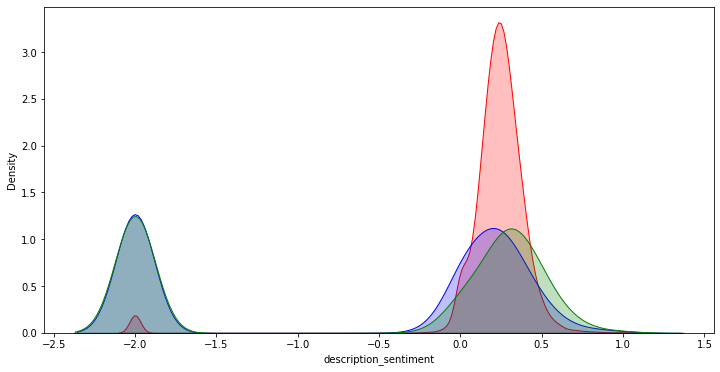

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
fig = sns.kdeplot(train['description_sentiment'], shade=True, color="r")
fig = sns.kdeplot(train['neighborhood_overview_sentiment'], shade=True, color="b")
fig = sns.kdeplot(train['host_about_sentiment'], shade=True, color="g")
plt.show()

In [ ]:
bins = [-2, -1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1.01]
labels = ['NA', 'Very Negative', 'Negative', 'Slightly Negative', 'Neutral', 'Slightly Positive', 'Positive', 'Very Positive']

train['description_sentiment'] = pd.cut(train['description_sentiment'], bins, labels=labels, right=False)
train['neighborhood_overview_sentiment'] = pd.cut(train['neighborhood_overview_sentiment'], bins, labels=labels, right=False)
train['host_about_sentiment'] = pd.cut(train['host_about_sentiment'], bins, labels=labels, right=False)
train

,index,id,name,description,neighborhood_overview,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,State,description_sentiment,neighborhood_overview_sentiment,host_about_sentiment
0,12418,52110187,vivienda entera otay a 5 minutos aeropuerto/ga...,Casa tranquila y perfecta para parejas o famil...,NaN,2021-09-06,"Tijuana, Mexico","Young business woman, I am very friendly and I...",within an hour,98%,100%,f,NaN,3.0,4.0,['phone'],t,t,Mission Bay,32.53345,-116.93667,Entire home,Entire home/apt,4,1 bath,2.0,2.0,"[""Cooking basics"", ""Laundromat nearby"", ""Stove...",64.0,1,1125,1125.0,1.0,1125.0,t,22,26,26,255,40,40,2,2021-09-29,2022-08-29,4.48,4.68,4.55,4.90,4.95,4.60,4.28,t,3.38,San Diego,Neutral,NA,Neutral
1,37945,557332653010524454,Single house for rent in quite neighborhood,"Great private, and quiet home. The home is loc...",NaN,2016-12-01,"Los Angeles, CA",NaN,within an hour,86%,100%,f,NaN,1.0,1.0,"['email', 'phone']",t,f,Westlake Village,34.15220,-118.84164,Entire home,Entire home/apt,4,1 bath,2.0,1.0,"[""Smoke alarm"", ""Dedicated workspace"", ""Kitche...",132.0,5,1125,1125.0,5.0,1125.0,t,23,53,83,83,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,Los Angeles,Slightly Positive,NA,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64666,38708,28538333,Serenity in the Hills-Entire 900 sqft Master S...,We can no longer accept bookings less than 31 ...,Affluent Anaheim Hills is a residential area w...,2018-09-14,"Anaheim, CA","I am originally from Bronx, New York, and I'v...",within an hour,100%,95%,t,Anaheim,2.0,2.0,"['email', 'phone']",t,t,Anaheim,33.83760,-117.78647,Private room in home,Private room,2,1 private bath,1.0,1.0,"[""Keypad"", ""Toaster"", ""BBQ grill"", ""Ceiling fa...",51.0,31,1125,1125.0,31.0,1125.0,t,0,1,12,27,14,9,0,2020-01-21,2022-07-25,5.00,5.00,4.93,5.00,5.00,5.00,5.00,f,0.44,Los Angeles,Neutral,Neutral,Neutral
64667,1668,14858332,Grab the Boogie Boards for the Afternoon at a ...,Head out on kayaks for an action-packed mornin...,The unit sits right at the water's edge in a v...,2016-08-05,NaN,Vacasa\nVacation Home Management\n\nVacasa unl...,within an hour,100%,97%,f,La Jolla,213.0,315.0,"['email', 'phone']",t,t,Mission Bay,32.76195,-117.24936,Entire condo,Entire home/apt,4,1 bath,1.0,2.0,"[""Wifi"", ""Dryer"", ""Children\u2019s dinnerware""...",575.0,3,365,365.0,3.8,135.6,t,19,41,71,346,9,0,0,2017-06-05,2021-06-03,4.78,5.00,5.00,4.67,5.00,4.33,4.67,t,0.14,San Diego,Neutral,Neutral,Neutral


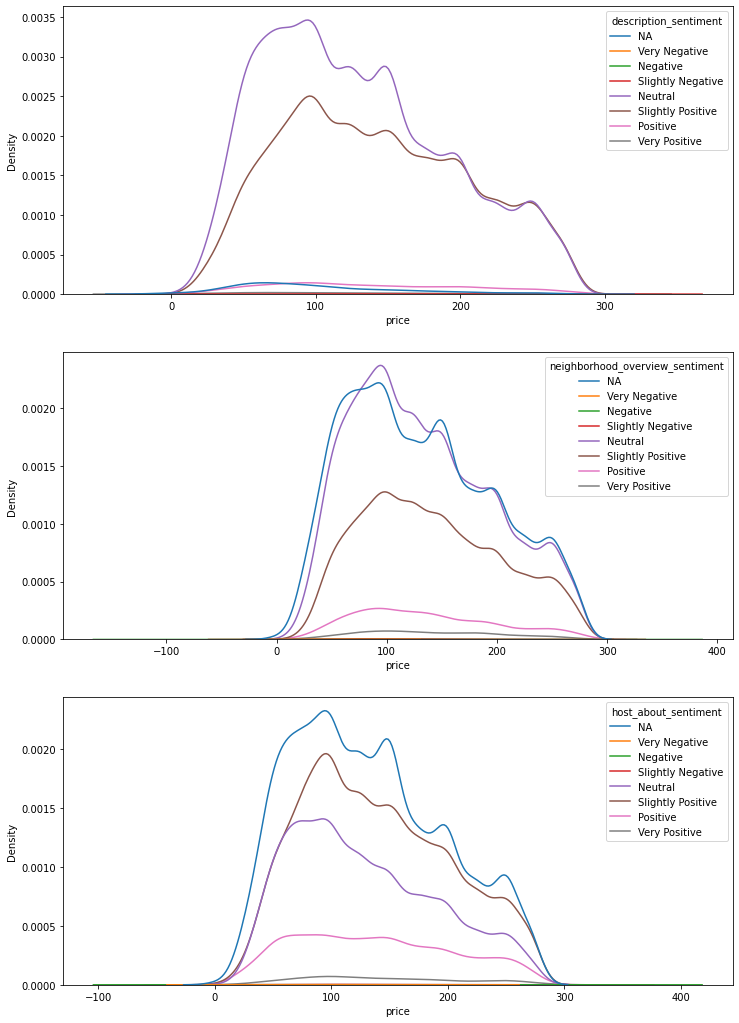

In [ ]:
train_filtered = train[train['price'] < 277]

fig, ax = plt.subplots(3, 1, figsize=(12, 18))
plot1 = sns.kdeplot(hue=train_filtered['description_sentiment'], x=train_filtered['price'], ax=ax[0], warn_singular=False)
plot2 = sns.kdeplot(hue=train_filtered['neighborhood_overview_sentiment'], x=train_filtered['price'], ax=ax[1], warn_singular=False)
plot3 = sns.kdeplot(hue=train_filtered['host_about_sentiment'], x=train_filtered['price'], ax=ax[2], warn_singular=False)

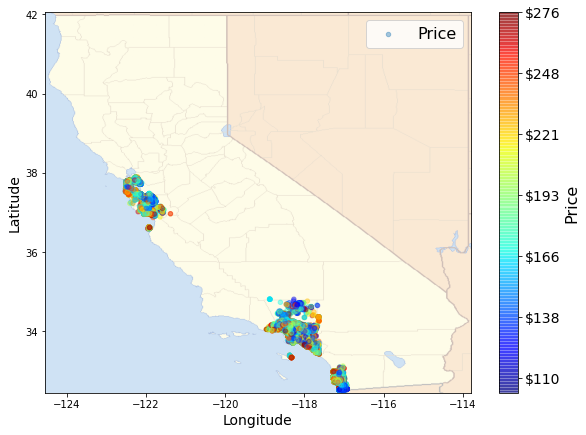

In [ ]:
import matplotlib.image as mpimg
california_img = mpimg.imread('/content/drive/My Drive/california.png')
ax = train_filtered.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  label="Price",
                  c="price", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = train_filtered['price']
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%d"%(round(v)) for v in tick_values], fontsize=14)
cbar.set_label('Price', fontsize=16)

plt.legend(fontsize=16)
plt.show()

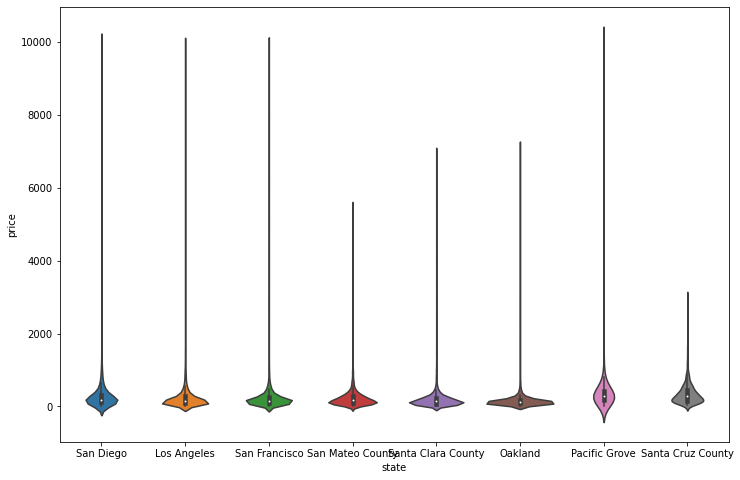

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.violinplot(data=train[train['price']<10000], x='state', y='price')

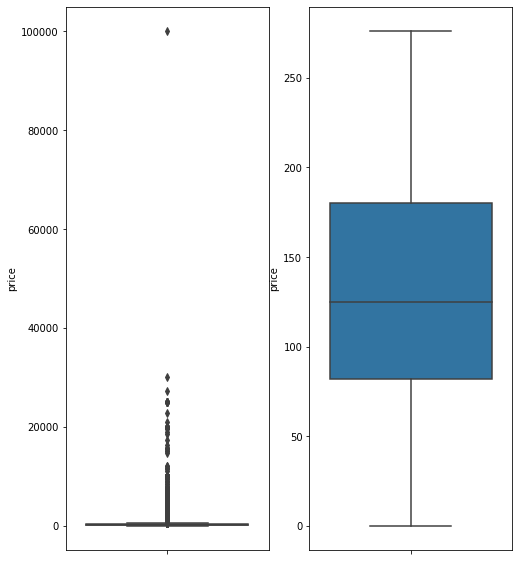

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 10))
sns.boxplot(y=train['price'], ax=ax1)
sns.boxplot(y=train_filtered['price'], ax=ax2)
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

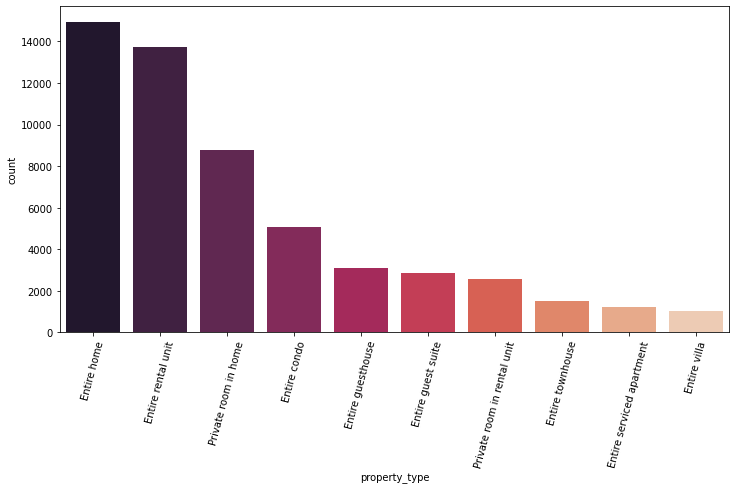

In [ ]:
dfg = train.groupby(['property_type']).size().to_frame('count').sort_values('count', ascending = False).head(10).reset_index()

fig, ax = plt.subplots(figsize=(12, 6))
bp = sns.barplot(x=dfg['property_type'], y=dfg['count'], palette='rocket')
plt.xticks(rotation=75)

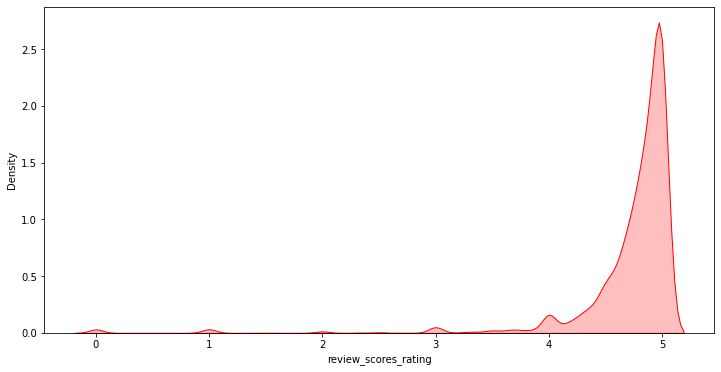

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(train['review_scores_rating'], shade=True, color='r')

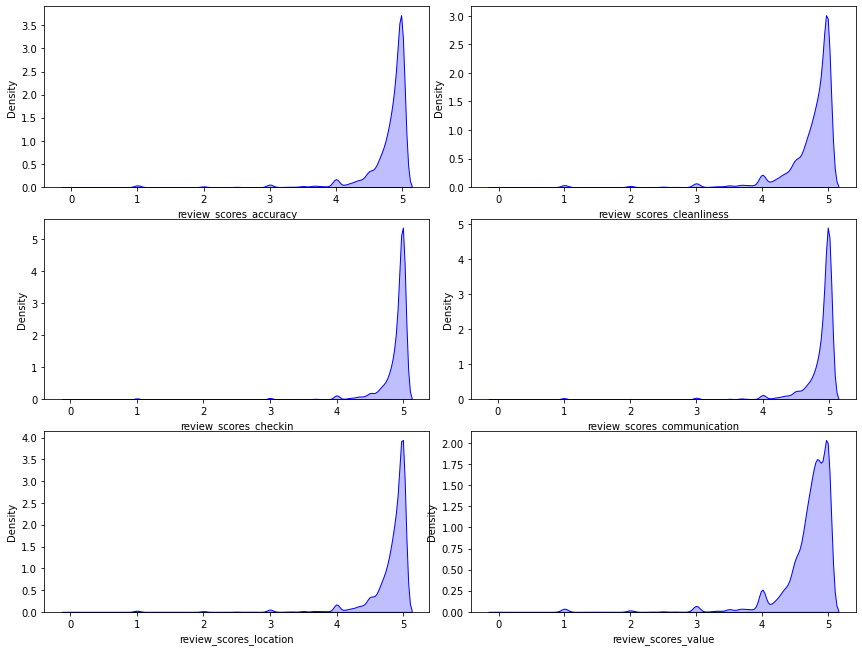

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(12, 9))
fig.tight_layout()
sns.kdeplot(train['review_scores_accuracy'], shade=True, color='b', ax=axs[0,0])
sns.kdeplot(train['review_scores_cleanliness'], shade=True, color='b', ax=axs[0,1])
sns.kdeplot(train['review_scores_checkin'], shade=True, color='b', ax=axs[1,0])
sns.kdeplot(train['review_scores_communication'], shade=True, color='b', ax=axs[1,1])
sns.kdeplot(train['review_scores_location'], shade=True, color='b', ax=axs[2,0])
sns.kdeplot(train['review_scores_value'], shade=True, color='b', ax=axs[2,1])

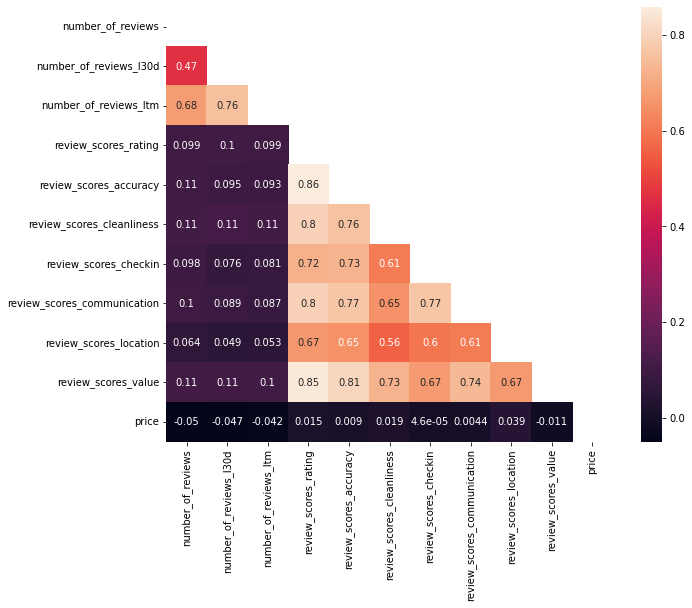

In [ ]:
review_and_price = train[['number_of_reviews', 'number_of_reviews_l30d', 'number_of_reviews_ltm', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'price']]
corr = review_and_price.corr()
matrix = np.triu(corr)
fig, ax = plt.subplots(figsize=(10, 8))
heatmap = sns.heatmap(corr, annot=True, mask=matrix)
plt.show()

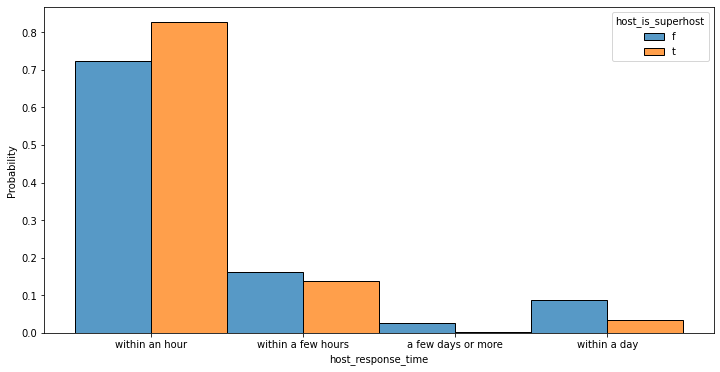

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
hist = sns.histplot(train, x='host_response_time', hue='host_is_superhost', multiple='dodge', stat='probability', common_norm=False)

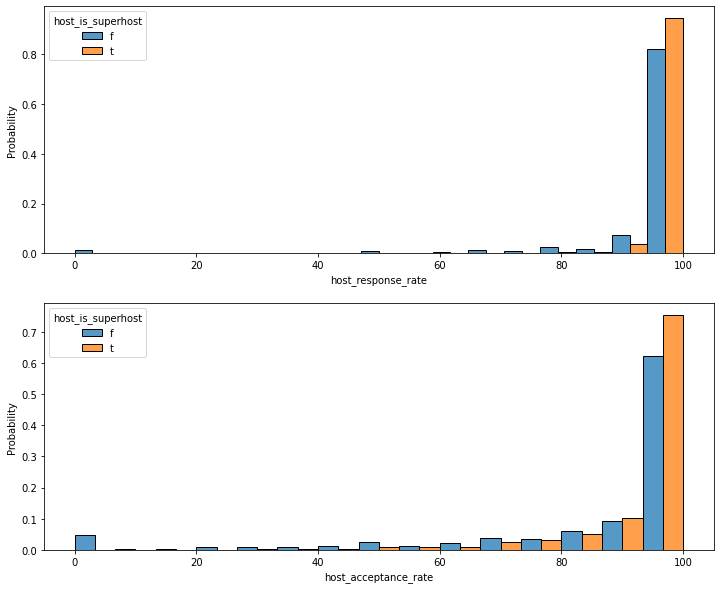

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
train['host_response_rate'] = train['host_response_rate'].replace('[\%]', '', regex=True).astype(float)
train['host_acceptance_rate'] = train['host_acceptance_rate'].replace('[\%]', '', regex=True).astype(float)
sns.histplot(train, x='host_response_rate', hue='host_is_superhost', multiple='dodge', ax=ax1, stat='probability', common_norm=False)
sns.histplot(train, x='host_acceptance_rate', hue='host_is_superhost', multiple='dodge', ax=ax2, bins=15, stat='probability', common_norm=False)

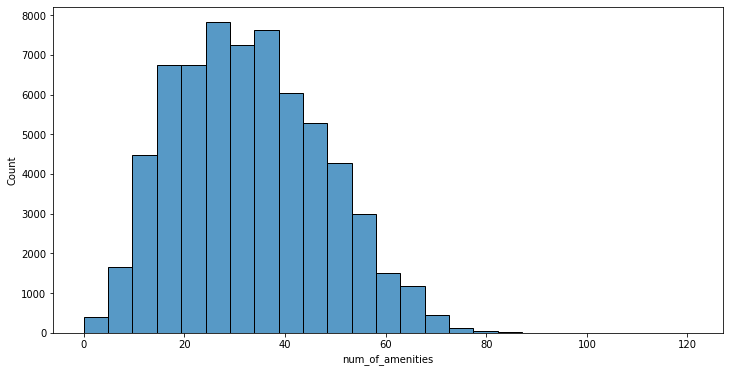

In [ ]:
import ast

def get_length(text):
  amenities_list = ast.literal_eval(text)
  return len(amenities_list)

train['num_of_amenities'] = train.amenities.apply(get_length)
fig, ax = plt.subplots(figsize=(12, 6))
hp = sns.histplot(train['num_of_amenities'], bins=25)

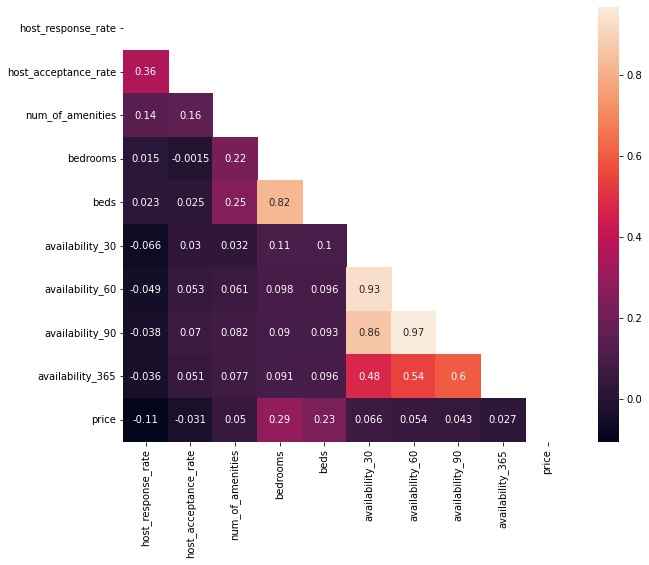

In [ ]:
host_listing_and_price = train[['host_response_rate', 'host_acceptance_rate', 'num_of_amenities', 'bedrooms', 'beds', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'price']]
corr = host_listing_and_price.corr()
matrix = np.triu(corr)
fig, ax = plt.subplots(figsize=(10, 8))
heatmap = sns.heatmap(corr, annot=True, mask=matrix)
plt.show()

# Data Cleaning & Pre-Processing

In [ ]:
pd.set_option('display.max_rows', None)
train.isnull().sum()

index                                  0
id                                     0
name                                   1
description                         1053
neighborhood_overview              24456
host_since                            85
host_location                      10205
host_about                         25043
host_response_time                 10046
host_response_rate                 10046
host_acceptance_rate                8314
host_is_superhost                     97
host_neighbourhood                 12087
host_listings_count                   85
host_total_listings_count             85
host_verifications                     0
host_has_profile_pic                  85
host_identity_verified                85
neighbourhood_cleansed                 0
latitude                               0
longitude                              0
property_type                          0
room_type                              0
accommodates                           0
bathrooms_text  

In [ ]:
train[train['name'].isna()]

,index,id,name,description,neighborhood_overview,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,State,description_sentiment,neighborhood_overview_sentiment,host_about_sentiment,num_of_amenities
6789,230,2687540,NaN,NaN,NaN,2014-03-30,US,NaN,NaN,NaN,0.0,f,Berryessa,1.0,1.0,"['email', 'phone']",t,f,San Jose,37.40788,-121.84793,Private room in home,Private room,2,1 bath,1.0,1.0,"[""Essentials"", ""Air conditioning"", ""Free parki...",80.0,2,1125,1125.0,2.0,1125.0,f,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,Santa Clara County,NA,NA,NA,19


In [ ]:
# seems like the 3 listings without a name/title are also missing many feature values, hence these data points might not be very relevant to us, choose to do row-wise deletion

train = train[train['name'].notna()]

In [ ]:
# already encoded description, neighborhood_overview and host_about to account for missing values, so drop the columns and keep the encoded columns

train.drop(['description', 'neighborhood_overview', 'host_about'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
review_missing = train[train['review_scores_rating'].isna()]
reviews_columns = ['first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']
review_missing[reviews_columns].isnull().sum()

first_review                   12522
last_review                    12522
review_scores_rating           12522
review_scores_accuracy         12522
review_scores_cleanliness      12522
review_scores_checkin          12522
review_scores_communication    12522
review_scores_location         12522
review_scores_value            12522
reviews_per_month              12522
dtype: int64

In [ ]:
from pandas.api.types import CategoricalDtype

# high number of missing values, unfeasible to drop completely. imputation might not be valuable, hence best to encode as missing (logical as a consumer)

review_bins = []
review_bin_labels = []
columns_to_bin = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']

left, right = 0, 0.1
for i in range(50):
  review_bins += [left]
  label = str(left) + ' to ' + str(right)
  review_bin_labels += [label]
  left = round(left + 0.1, 1)
  right = round(right + 0.1, 1)
  if i == 49:
    review_bins += [5.1]

for column in columns_to_bin:
  train[column] = pd.cut(train[column], bins=review_bins, labels=review_bin_labels, right=False)

train['reviews_per_month'] = train['reviews_per_month'].fillna(value=0)

cat_dtype = CategoricalDtype(categories=review_bin_labels+['NA'])
for column in reviews_columns:
  train[column] = train[column].astype(cat_dtype)
  train[column] = train[column].fillna(value='NA')

train.first_review = train.first_review.astype('category')
train.last_review = train.last_review.astype('category')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [ ]:
host_missing_info = train[train['host_since'].isna()]
host_info = ['host_since', 'host_location','host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified']
host_missing_info[host_info].isnull().sum()

host_since                   85
host_location                85
host_response_time           85
host_response_rate           85
host_acceptance_rate         85
host_neighbourhood           85
host_listings_count          85
host_total_listings_count    85
host_has_profile_pic         85
host_identity_verified       85
dtype: int64

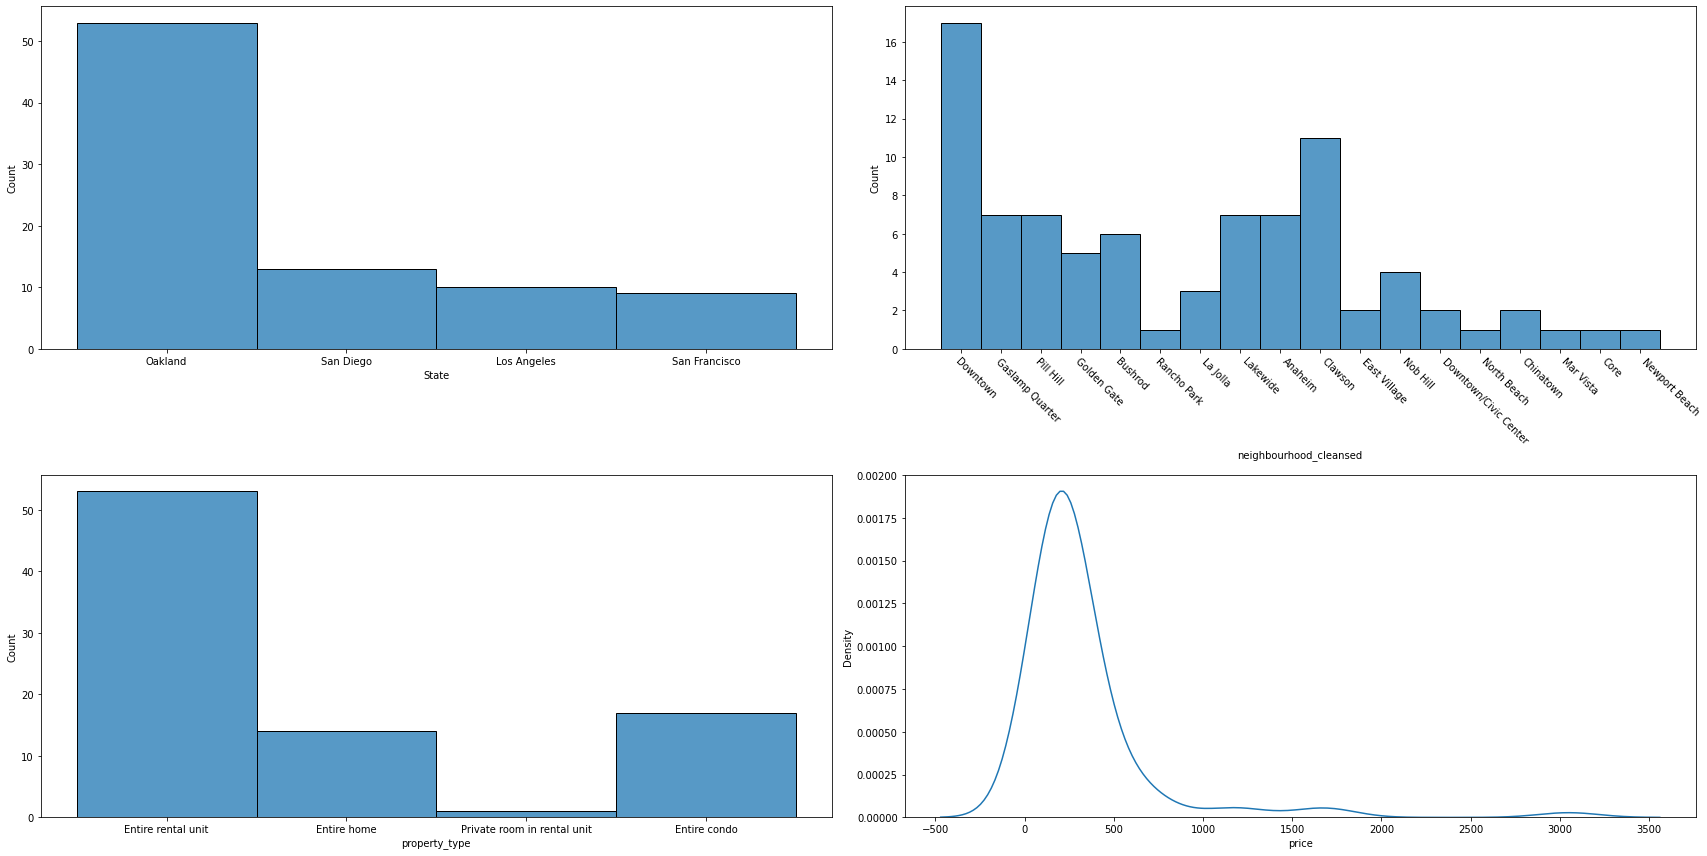

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(24, 12))
plt.setp(ax[0,1].xaxis.get_majorticklabels(), rotation=-45, ha="left", rotation_mode="anchor")
hp1 = sns.histplot(host_missing_info['State'], ax=ax[0,0])
hp2 = sns.histplot(host_missing_info['neighbourhood_cleansed'], ax=ax[0,1])
hp3 = sns.histplot(host_missing_info['property_type'], ax=ax[1,0])
kp = sns.kdeplot(host_missing_info['price'], ax=ax[1,1])
plt.tight_layout()

In [ ]:
# since we do not see any obvious anomalies in the distribution for the rest of the data, data seems to be missing completely at random. drop the missing rows

train = train[train['host_since'].notna()]

In [ ]:
superhost_missing = train[train['host_is_superhost'].isna()]
price_info = pd.DataFrame(columns = ['superhost_missing', 'train', 'not_superhost'])
price_info['superhost_missing'] = superhost_missing['price'].describe()
price_info['train'] = train['price'].describe()
price_info['not_superhost'] = train[train['host_is_superhost'] == 'f']['price'].describe()
price_info

,superhost_missing,train,not_superhost
count,97.000000,64582.000000,43301.000000
mean,2628.969072,291.519362,306.162118
std,2731.242977,864.513386,990.681785
min,0.000000,0.000000,0.000000
25%,1081.000000,97.000000,93.000000
50%,2000.000000,159.000000,156.000000
75%,3458.000000,278.000000,275.000000
max,17250.000000,100000.000000,100000.000000


In [ ]:
# for hosts which are missing the superhost info, the target variable seems to be extreme outliers -> drop 

train = train[train['host_is_superhost'].notna()]

In [ ]:
train['host_response_time'] = train['host_response_time'].fillna('NA')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
bins = [0, 50, 70, 80, 90, 95, 101]
response_rate_labels = ['unresponsive', 'somewhat unresponsive', 'somewhat responsive', 'responsive', 'very responsive', 'extremely responsive']
acceptance_rate_labels = ['very low', 'low', 'average', 'high', 'very high', 'extremely high']
train['host_response_rate'] = pd.cut(train['host_response_rate'], bins=bins, labels=response_rate_labels, right=False)
train['host_acceptance_rate'] = pd.cut(train['host_acceptance_rate'], bins=bins, labels=acceptance_rate_labels, right=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
cat_dtype_response = CategoricalDtype(categories=response_rate_labels+['NA'])
cat_dtype_acceptance = CategoricalDtype(categories=acceptance_rate_labels+['NA'])
train['host_response_rate'] = train['host_response_rate'].astype(cat_dtype_response)
train['host_acceptance_rate'] = train['host_acceptance_rate'].astype(cat_dtype_acceptance)
train['host_response_rate'] = train['host_response_rate'].fillna('NA')
train['host_acceptance_rate'] = train['host_acceptance_rate'].fillna('NA')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

bedroom_not_na = train[train['bedrooms'].notna()]
bedrooms = bedroom_not_na['bedrooms']
accommodates = bedroom_not_na[['accommodates']]
bedrooms_model = LinearRegression()
bedrooms_model.fit(accommodates, bedrooms)
bedroom_pred = bedrooms_model.predict(accommodates)
mean_squared_error(bedrooms, bedroom_pred)

0.3967087353484153

In [ ]:
bed_not_na = train[train['beds'].notna()]
beds = bed_not_na['beds']
accommodates = bed_not_na[['accommodates']]
beds_model = LinearRegression()
beds_model.fit(accommodates, beds)
bedroom_pred = beds_model.predict(accommodates)
mean_squared_error(beds, bedroom_pred)

0.885327366097879

In [ ]:
import math
import warnings

warnings.simplefilter("ignore", UserWarning)
for index, row in train.iterrows():
  value = row['accommodates']
  if math.isnan(row['bedrooms']):
    train.at[index, 'bedrooms'] = round(bedrooms_model.predict([[value]])[0])
  if math.isnan(row['beds']):
    train.at[index, 'beds'] = round(beds_model.predict([[value]])[0])

In [ ]:
train['bathroom_qty'] = train['bathrooms_text'].str.split(' ', expand=True)[0]
train['bathroom_type'] = train['bathrooms_text'].str.split(' ', expand=True)[1]

In [ ]:
train['bathroom_qty'] = train['bathroom_qty'].fillna('NA')
train['bathroom_type'] = train['bathroom_type'].fillna('NA')

In [ ]:
train.isnull().sum()

index                                  0
id                                     0
name                                   0
host_since                             0
host_location                      10103
host_response_time                     0
host_response_rate                     0
host_acceptance_rate                   0
host_is_superhost                      0
host_neighbourhood                 11988
host_listings_count                    0
host_total_listings_count              0
host_verifications                     0
host_has_profile_pic                   0
host_identity_verified                 0
neighbourhood_cleansed                 0
latitude                               0
longitude                              0
property_type                          0
room_type                              0
accommodates                           0
bathrooms_text                        68
bedrooms                               0
beds                                   0
amenities       

In [ ]:
import ast

train.reset_index(inplace=True)
amenities_categorisation = {
    'essentials': ['soap', 'shampoo', 'towel', 'conditioner', 'toiletries', 'linen', 'water'],
    'luxury': ['pool', 'tub', 'park', 'sound', 'wifi'],
    'appliances': ['refrigerator', 'stove', 'oven', 'washer', 'dryer', 'microwave'],
    'comfort': ['heat', 'air condition'],
    'entertainment': ['tv', 'console', 'gym', 'game', 'entertainment'],
    'security': ['lock', 'alarm', 'guard'],
    'furniture': ['storage', 'chair', 'table', 'bed']
}

for category in amenities_categorisation.keys():
  train[category] = 0
train['miscellaneous'] = 0

def category_counter(amenity, idx):
  for category, category_list in amenities_categorisation.items():
    for item in category_list:
      if item in amenities.lower():
        train.loc[idx, category] += 1
        return True
  return False

unmapped_amenities = []
for i in range(train.shape[0]):
  amenities_list = ast.literal_eval(train.loc[i, 'amenities'])
  for amenities in amenities_list:
    mapped = category_counter(amenities, i)
    if not mapped:
      train.loc[i, 'miscellaneous'] += 1 
      if amenities not in unmapped_amenities:
        unmapped_amenities.append(amenities)       

In [ ]:
len(unmapped_amenities)

231

In [ ]:
unmapped_amenities

['Cooking basics',
 'Laundromat nearby',
 'Iron',
 'Luggage dropoff allowed',
 'Room-darkening shades',
 'Safe',
 'Private entrance',
 'Hangers',
 'Trash compactor',
 'Long term stays allowed',
 'Kitchen',
 'Essentials',
 'Pour-over coffee',
 'Coffee maker',
 'Freezer',
 'Dishes and silverware',
 'Cleaning products',
 'Dedicated workspace',
 'First aid kit',
 'Security cameras on property',
 'Patio or balcony',
 'Backyard',
 'Fire pit',
 'Wine glasses',
 'Keypad',
 'BBQ grill',
 'Ceiling fan',
 'Shared fenced garden or backyard',
 'Extra pillows and blankets',
 'Shower gel',
 'Mini fridge',
 'Bidet',
 'Window AC unit',
 'Drying rack for clothing',
 'Fire extinguisher',
 'Breakfast',
 'Toaster',
 'Outdoor dining area',
 'Elevator',
 'Mosquito net',
 'Outdoor furniture',
 'Private patio or balcony',
 'Ethernet connection',
 'Outdoor shower',
 'Indoor fireplace',
 'Children’s books and toys',
 'Pack ’n play/Travel crib',
 'Single level home',
 'Beachfront',
 'Host greets you',
 'Keurig co

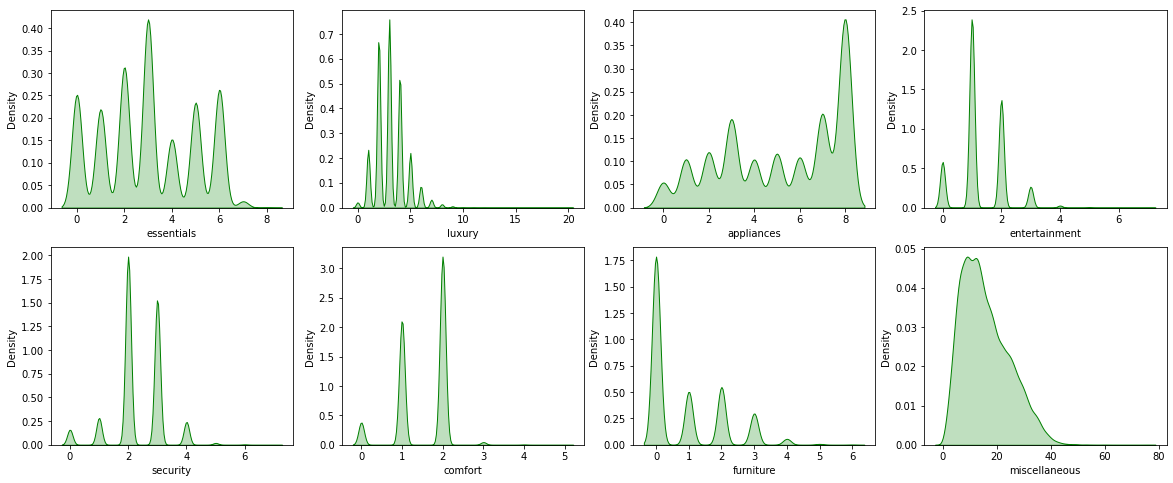

In [ ]:
fig, ax = plt.subplots(2, 4, figsize=(20, 8))
fig = sns.kdeplot(train['essentials'], shade=True, color="g", ax=ax[0,0])
fig = sns.kdeplot(train['luxury'], shade=True, color="g", ax=ax[0,1])
fig = sns.kdeplot(train['appliances'], shade=True, color="g", ax=ax[0,2])
fig = sns.kdeplot(train['entertainment'], shade=True, color="g", ax=ax[0,3])
fig = sns.kdeplot(train['security'], shade=True, color="g", ax=ax[1,0])
fig = sns.kdeplot(train['comfort'], shade=True, color="g", ax=ax[1,1])
fig = sns.kdeplot(train['furniture'], shade=True, color="g", ax=ax[1,2])
fig = sns.kdeplot(train['miscellaneous'], shade=True, color="g", ax=ax[1,3])
plt.show()

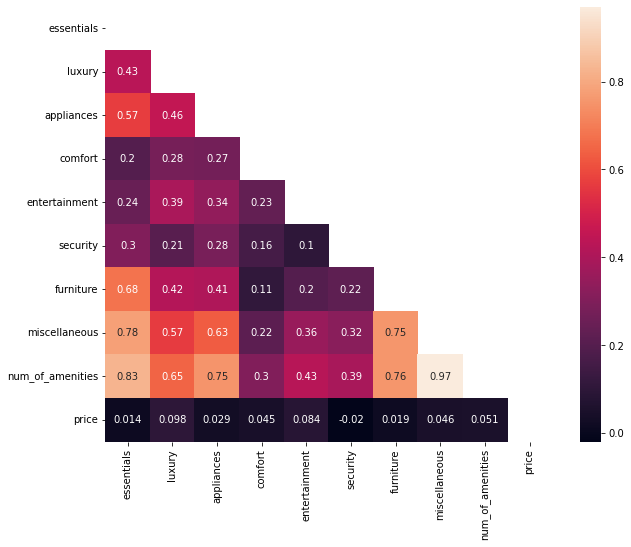

In [ ]:
amenities_features = train[['essentials', 'luxury', 'appliances', 'comfort', 'entertainment', 'security', 'furniture', 'miscellaneous', 'num_of_amenities', 'price']]
corr = amenities_features.corr()
matrix = np.triu(corr)
fig, ax = plt.subplots(figsize=(10, 8))
heatmap = sns.heatmap(corr, annot=True, mask=matrix)
plt.show()

In [ ]:
columns_to_keep = ['name', 
                   'description_sentiment', 
                   'neighborhood_overview_sentiment', 
                   'host_response_time', 
                   'host_is_superhost', 
                   'host_total_listings_count', 
                   'host_has_profile_pic', 
                   'host_identity_verified', 
                   'neighbourhood_cleansed', 
                   'latitude', 
                   'longitude', 
                   'property_type', 
                   'room_type', 
                   'accommodates', 
                   'bedrooms', 
                   'beds', 
                   'essentials',
                   'luxury',
                   'appliances',
                   'entertainment',
                   'security',
                   'comfort',
                   'furniture',
                   'miscellaneous',
                   'price', 
                   'availability_30', 
                   'number_of_reviews', 
                   'review_scores_rating', 
                   'review_scores_accuracy', 
                   'review_scores_cleanliness',
                   'review_scores_checkin',
                   'review_scores_communication',
                   'review_scores_location',
                   'review_scores_value',
                   'instant_bookable',
                   'bathroom_qty',
                   'bathroom_type']

In [ ]:
pd.set_option('display.max_rows', None)
cleaned_train = train[columns_to_keep]
cleaned_train = cleaned_train[cleaned_train['price'] <= 10000]
cleaned_train.reset_index(inplace=True)
cleaned_train.to_csv('/content/drive/My Drive/BT4222 Data Mining/Code & Data/cleaned_train.csv')

In [ ]:
pd.set_option('display.max_rows', 5)
test['description_sentiment'] = test.description.apply(detect_sentiment)
test['neighborhood_overview_sentiment'] = test.neighborhood_overview.apply(detect_sentiment)
test['host_about_sentiment'] = test.host_about.apply(detect_sentiment)
test['price'] = test['price'].replace('[\$,]', '', regex=True).astype(float)
test

,id,name,description,neighborhood_overview,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,State,description_sentiment,neighborhood_overview_sentiment,host_about_sentiment
42272,667588201030992847,"Luxury new 4br/2ba pool home, yard, safe, parking",Have fun with the whole family at this stylish...,NaN,2019-05-02,NaN,NaN,within an hour,100%,87%,f,Southwest Anaheim,21.0,41.0,"['email', 'phone']",t,t,Anaheim,33.82355,-117.933319,Entire home,Entire home/apt,9,2 baths,4.0,5.0,"[""Clothing storage"", ""BBQ grill"", ""Air conditi...",334.0,31,365,365.0,31.0,365.0,t,30,60,90,365,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,Los Angeles,0.333333,-2.00,-2.0000
17464,41592289,Los Angeles Contemporary,Newly remodeled apartment with modern furnishi...,NaN,2020-01-15,"Los Angeles, CA",NaN,within an hour,100%,73%,f,East Hollywood,8.0,11.0,"['email', 'phone']",t,t,Jefferson Park,34.03139,-118.315910,Entire rental unit,Entire home/apt,4,1 bath,1.0,2.0,"[""Cable TV"", ""Air conditioning"", ""Bed linens"",...",105.0,30,365,365.0,30.0,365.0,t,21,47,72,72,18,0,0,2020-01-25,2020-09-21,4.63,4.94,4.5,4.63,4.88,4.94,4.75,f,0.56,Los Angeles,0.211136,-2.00,-2.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3888,40728398,Entire Modern Apt. UCSF Mission Bay,"It's a modern, beautiful one bedroom apt. with...","UCSF Mission Bay, Chase Center, Dogpatch, Fina...",2008-09-06,"California, United States",I'm a Chinese-American pianist who just joined...,NaN,NaN,NaN,f,Mission Bay,1.0,9.0,"['email', 'phone']",t,t,South of Market,37.76943,-122.389090,Entire rental unit,Entire home/apt,4,1 bath,1.0,NaN,"[""Wifi"", ""Private entrance"", ""Long term stays ...",99.0,30,36,36.0,30.0,36.0,t,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,NaN,San Francisco,0.384211,-0.05,0.2625
18121,42918648,Chic NYC still apartment,"You’re welcome to use the WiFi, and Netflix. T...",NaN,2018-01-15,"Los Angeles, CA",NaN,a few days or more,0%,NaN,f,NaN,1.0,1.0,"['email', 'phone']",t,t,Koreatown,34.06770,-118.296340,Entire rental unit,Entire home/apt,2,1 bath,1.0,2.0,"[""Breakfast"", ""Air conditioning"", ""Carbon mono...",100.0,30,90,90.0,30.0,90.0,t,30,60,89,89,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,Los Angeles,0.271429,-2.00,-2.0000


In [ ]:
bins = [-2, -1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1.01]
labels = ['NA', 'Very Negative', 'Negative', 'Slightly Negative', 'Neutral', 'Slightly Positive', 'Positive', 'Very Positive']

test['description_sentiment'] = pd.cut(test['description_sentiment'], bins, labels=labels, right=False)
test['neighborhood_overview_sentiment'] = pd.cut(test['neighborhood_overview_sentiment'], bins, labels=labels, right=False)
test['host_about_sentiment'] = pd.cut(test['host_about_sentiment'], bins, labels=labels, right=False)
test

,id,name,description,neighborhood_overview,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,State,description_sentiment,neighborhood_overview_sentiment,host_about_sentiment
42272,667588201030992847,"Luxury new 4br/2ba pool home, yard, safe, parking",Have fun with the whole family at this stylish...,NaN,2019-05-02,NaN,NaN,within an hour,100%,87%,f,Southwest Anaheim,21.0,41.0,"['email', 'phone']",t,t,Anaheim,33.82355,-117.933319,Entire home,Entire home/apt,9,2 baths,4.0,5.0,"[""Clothing storage"", ""BBQ grill"", ""Air conditi...",334.0,31,365,365.0,31.0,365.0,t,30,60,90,365,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,Los Angeles,Slightly Positive,NA,NA
17464,41592289,Los Angeles Contemporary,Newly remodeled apartment with modern furnishi...,NaN,2020-01-15,"Los Angeles, CA",NaN,within an hour,100%,73%,f,East Hollywood,8.0,11.0,"['email', 'phone']",t,t,Jefferson Park,34.03139,-118.315910,Entire rental unit,Entire home/apt,4,1 bath,1.0,2.0,"[""Cable TV"", ""Air conditioning"", ""Bed linens"",...",105.0,30,365,365.0,30.0,365.0,t,21,47,72,72,18,0,0,2020-01-25,2020-09-21,4.63,4.94,4.5,4.63,4.88,4.94,4.75,f,0.56,Los Angeles,Neutral,NA,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3888,40728398,Entire Modern Apt. UCSF Mission Bay,"It's a modern, beautiful one bedroom apt. with...","UCSF Mission Bay, Chase Center, Dogpatch, Fina...",2008-09-06,"California, United States",I'm a Chinese-American pianist who just joined...,NaN,NaN,NaN,f,Mission Bay,1.0,9.0,"['email', 'phone']",t,t,South of Market,37.76943,-122.389090,Entire rental unit,Entire home/apt,4,1 bath,1.0,NaN,"[""Wifi"", ""Private entrance"", ""Long term stays ...",99.0,30,36,36.0,30.0,36.0,t,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,NaN,San Francisco,Slightly Positive,Neutral,Slightly Positive
18121,42918648,Chic NYC still apartment,"You’re welcome to use the WiFi, and Netflix. T...",NaN,2018-01-15,"Los Angeles, CA",NaN,a few days or more,0%,NaN,f,NaN,1.0,1.0,"['email', 'phone']",t,t,Koreatown,34.06770,-118.296340,Entire rental unit,Entire home/apt,2,1 bath,1.0,2.0,"[""Breakfast"", ""Air conditioning"", ""Carbon mono...",100.0,30,90,90.0,30.0,90.0,t,30,60,89,89,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,Los Angeles,Slightly Positive,NA,NA


In [ ]:
test['host_response_rate'] = test['host_response_rate'].replace('[\%]', '', regex=True).astype(float)
test['host_acceptance_rate'] = test['host_acceptance_rate'].replace('[\%]', '', regex=True).astype(float)

In [ ]:
review_bins = []
review_bin_labels = []
columns_to_bin = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']

left, right = 0, 0.1
for i in range(50):
  review_bins += [left]
  label = str(left) + ' to ' + str(right)
  review_bin_labels += [label]
  left = round(left + 0.1, 1)
  right = round(right + 0.1, 1)
  if i == 49:
    review_bins += [5.1]

for column in columns_to_bin:
  test[column] = pd.cut(test[column], bins=review_bins, labels=review_bin_labels, right=False)

test['reviews_per_month'] = test['reviews_per_month'].fillna(value=0)

cat_dtype = CategoricalDtype(categories=review_bin_labels+['NA'])
for column in reviews_columns:
  test[column] = test[column].astype(cat_dtype)
  test[column] = test[column].fillna(value='NA')

In [ ]:
bins = [0, 50, 70, 80, 90, 95, 101]
response_rate_labels = ['unresponsive', 'somewhat unresponsive', 'somewhat responsive', 'responsive', 'very responsive', 'extremely responsive']
acceptance_rate_labels = ['very low', 'low', 'average', 'high', 'very high', 'extremely high']
test['host_response_rate'] = pd.cut(test['host_response_rate'], bins=bins, labels=response_rate_labels, right=False)
test['host_acceptance_rate'] = pd.cut(test['host_acceptance_rate'], bins=bins, labels=acceptance_rate_labels, right=False)

In [ ]:
cat_dtype_response = CategoricalDtype(categories=response_rate_labels+['NA'])
cat_dtype_acceptance = CategoricalDtype(categories=acceptance_rate_labels+['NA'])
test['host_response_rate'] = test['host_response_rate'].astype(cat_dtype_response)
test['host_acceptance_rate'] = test['host_acceptance_rate'].astype(cat_dtype_acceptance)
test['host_response_rate'] = test['host_response_rate'].fillna('NA')
test['host_acceptance_rate'] = test['host_acceptance_rate'].fillna('NA')

In [ ]:
for index, row in test.iterrows():
  value = row['accommodates']
  if math.isnan(row['bedrooms']):
    test.at[index, 'bedrooms'] = round(bedrooms_model.predict([[value]])[0])
  if math.isnan(row['beds']):
    test.at[index, 'beds'] = round(beds_model.predict([[value]])[0])

In [ ]:
test['bathroom_qty'] = test['bathrooms_text'].str.split(' ', expand=True)[0]
test['bathroom_type'] = test['bathrooms_text'].str.split(' ', expand=True)[1]
test['bathroom_qty'] = test['bathroom_qty'].fillna('NA')
test['bathroom_type'] = test['bathroom_type'].fillna('NA')

In [ ]:
test['host_response_time'] = test['host_response_time'].fillna('NA')

In [ ]:
test.reset_index(inplace=True)
for category in amenities_categorisation.keys():
  test[category] = 0
test['miscellaneous'] = 0

def category_counter(amenity, idx):
  for category, category_list in amenities_categorisation.items():
    for item in category_list:
      if item in amenities.lower():
        test.loc[idx, category] += 1
        return True
  return False

unmapped_amenities = []
for i in range(test.shape[0]):
  amenities_list = ast.literal_eval(test.loc[i, 'amenities'])
  for amenities in amenities_list:
    mapped = category_counter(amenities, i)
    if not mapped:
      test.loc[i, 'miscellaneous'] += 1 
      if amenities not in unmapped_amenities:
        unmapped_amenities.append(amenities)   

In [ ]:
pd.set_option('display.max_rows', None)
test_dropped = test[columns_to_keep]
test_dropped = test_dropped[test_dropped['host_is_superhost'].notna()]
test_dropped = test_dropped[test_dropped['host_total_listings_count'].notna()]
test_dropped = test_dropped[test_dropped['price'] <= 10000]
test_dropped.reset_index(inplace=True)
test_dropped.isnull().sum()

index                              0
name                               2
description_sentiment              0
neighborhood_overview_sentiment    0
host_response_time                 0
host_is_superhost                  0
host_total_listings_count          0
host_has_profile_pic               0
host_identity_verified             0
neighbourhood_cleansed             0
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bedrooms                           0
beds                               0
essentials                         0
luxury                             0
appliances                         0
entertainment                      0
security                           0
comfort                            0
furniture                          0
miscellaneous                      0
price                              0
availability_30                    0
n

In [ ]:
test_dropped.to_csv('/content/drive/My Drive/BT4222 Data Mining/Code & Data/cleaned_test.csv')

In [ ]:
cleaned_train.nunique()

index                              64440
name                               61721
description_sentiment                  8
neighborhood_overview_sentiment        8
host_response_time                     5
host_is_superhost                      2
host_total_listings_count            273
host_has_profile_pic                   2
host_identity_verified                 2
neighbourhood_cleansed               591
latitude                           49560
longitude                          50900
property_type                        117
room_type                              4
accommodates                          17
bedrooms                              20
beds                                  31
essentials                             9
luxury                                13
appliances                             9
entertainment                          6
security                               8
comfort                                6
furniture                              7
miscellaneous   

# Transferred Stuff

In [ ]:
data['bedrooms_per_accommodates'] = data['bedrooms'] / data['accommodates']
data['beds_per_accommodates'] = data['beds'] / data['accommodates']
data['bathrooms_per_accommodates'] = data['bathrooms'] / data['accommodates']

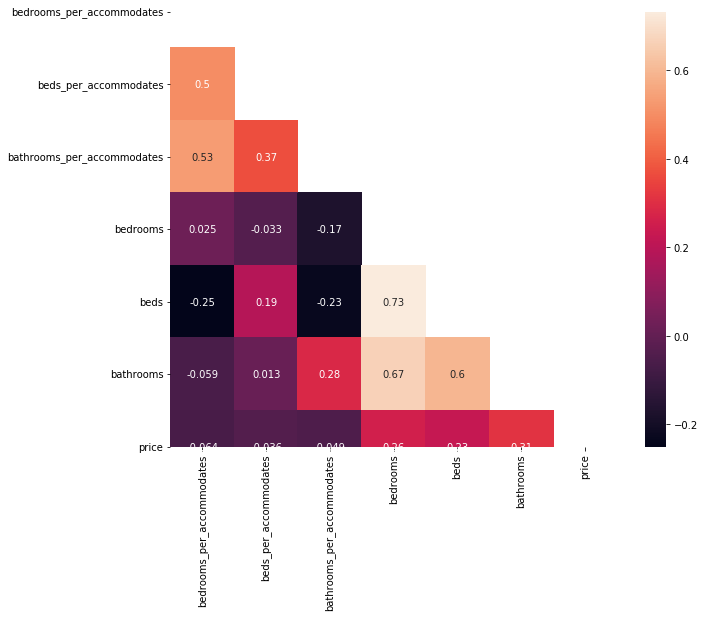

In [ ]:
data2 = data[['bedrooms_per_accommodates', 'beds_per_accommodates', 'bathrooms_per_accommodates', 'bedrooms', 'beds', 'bathrooms', 'price']]
corr = data2.corr()
matrix = np.triu(corr)
fig, ax = plt.subplots(figsize=(10, 8))
heatmap = sns.heatmap(corr, annot=True, mask=matrix)
plt.show()

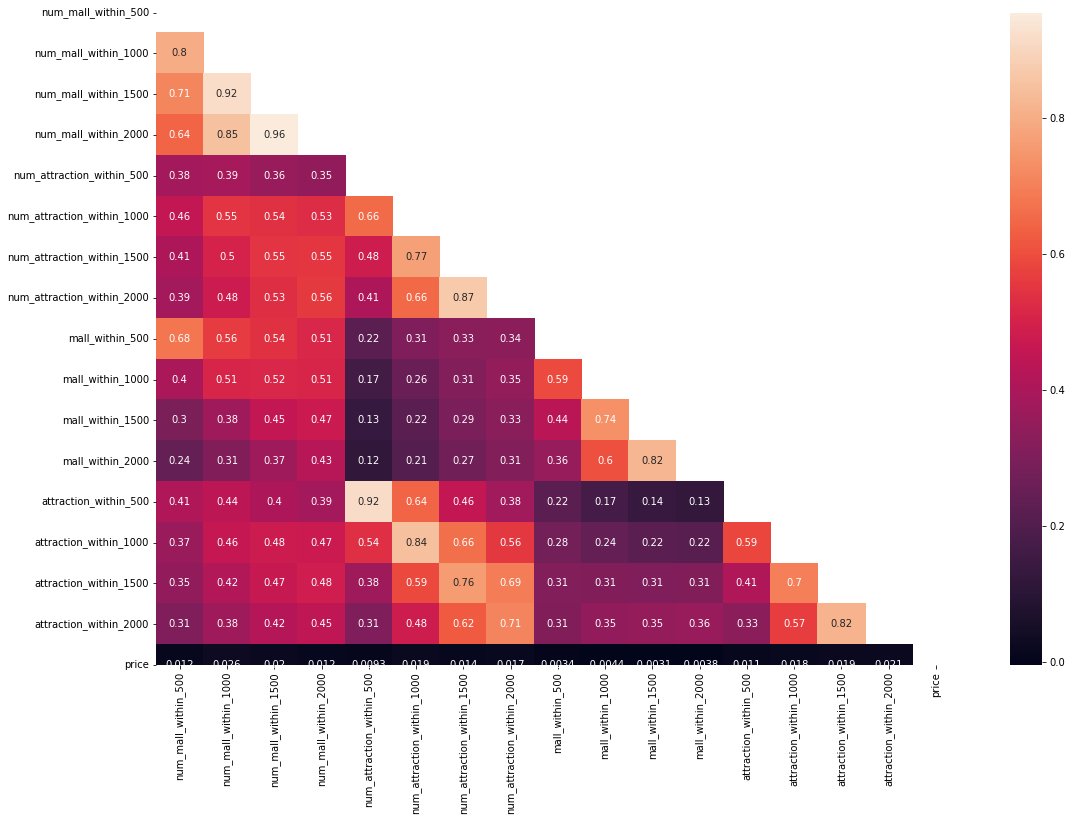

In [ ]:
data3 = data[['num_mall_within_500', 'num_mall_within_1000',	'num_mall_within_1500',	'num_mall_within_2000',	'num_attraction_within_500',	'num_attraction_within_1000',	'num_attraction_within_1500',	'num_attraction_within_2000',	'mall_within_500',	'mall_within_1000',	'mall_within_1500',	'mall_within_2000',	'attraction_within_500',	'attraction_within_1000',	'attraction_within_1500',	'attraction_within_2000', 'price']]
corr = data3.corr()
matrix = np.triu(corr)
fig, ax = plt.subplots(figsize=(18, 12))
heatmap = sns.heatmap(corr, annot=True, mask=matrix)
plt.show()

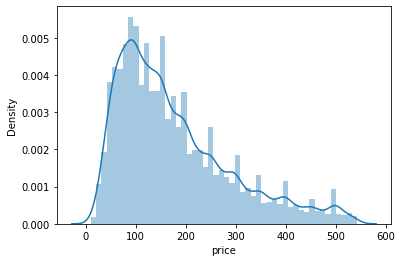

In [ ]:
dp = sns.distplot(train['price'])